<a href="https://colab.research.google.com/github/Masinga288/Test1/blob/main/Test_1_N_Masinga_22426770.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Student Details:**

*   22426770
*   Masinga N

Dataset: Nova Scotia Communities, Culture, Tourism and Heritage Funding Programs (2023-2024).

Source:
This dataset was obtained from google Dataset Search, Dataset Search is a search engine for datasets.  
For academic purposes, I am treating it as representative of publicly available government funding data.

File Format:
The dataset is provided in CSV format (Communities__Culture__Tourism__and_Heritage_Funding_Programs_and_Resources.csv), meeting the assignment requirements.

Suitability Justification:

1. Relevance to Tourism and Cultural Diversity:
   - Contains detailed records of funding allocations for cultural, tourism, and heritage projects
   - Includes specific programs supporting Indigenous (Mi'kmaq), Acadian/Francophone, and other cultural communities
   - Documents investments in festivals, museums, and cultural events that drive tourism.

2. Data Completeness:
   - Contains 1,798 records with complete fields for:
     - Grant programs
     - Funding amounts
     - Recipient organizations
     - Geographic locations (counties)
   

3. Credibility:
   - Appears to be official government data based on:
     - Realistic program names and funding amounts
     - Accurate Nova Scotia geographic references
     - Professional structure matching public sector reporting

4. Analytical Value:
   - Enables analysis of:
     - Funding distribution across cultural sectors
     - Geographic equity in tourism investments
     - Support for diverse cultural communities
     - Patterns in large vs small grants

While the dataset focuses on Nova Scotia rather than South Africa, it
serves as an excellent proxy for:
- Methods to analyze tourism/cultural funding distribution
- Techniques for assessing regional representation
- Approaches to evaluate support for diverse communities

These analytical approaches can be directly transferred to similar South African datasets.


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
file_path = '/content/drive/MyDrive/Test 1 Dataset/Communities__Culture__Tourism__and_Heritage_Funding_Programs_and_Resources.csv'
df = pd.read_csv(file_path, delimiter=';')
df.head()

,Grant Program,Fiscal Year,Funding Amount,Recipient,County
0,Acadian & Francophone Community Projects,2023-2024,"9,018",Alliance Francaise D'Halifax - Dartmouth,Halifax
1,Acadian & Francophone Community Projects,2023-2024,"5,113",Association francophone de la vallée,Kings
2,Acadian & Francophone Community Projects,2023-2024,"24,000",Association of Nova Scotia Museums,Halifax
3,Acadian & Francophone Community Projects,2023-2024,"9,813",Chester Theatre Council (Chester Playhouse),Lunenburg
4,Acadian & Francophone Community Projects,2023-2024,"12,000",Conseil communautaire du Grand-Havre,Halifax


##Data Understanding  
This section explores the dataset's structure, completeness using:  
1. Basic inspection  
2. Missing value analysis   

1. Basic Dataset Inspection  
 **Purpose**: Understand dataset dimensions and structure  
 **Methods**:  
  - Shape inspection  
  - Head/sample displays  
  - Data type verification  


In [3]:
print("=== Dataset Shape ===")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

print("\n=== First 5 Rows ===")
display(df.head())

print("\n=== Random 5 Rows ===")
display(df.sample(5))

print("\n=== Column Data Types ===")
display(df.dtypes)

print("\n=== Basic Statistics ===")
display(df.describe(include='all'))

=== Dataset Shape ===
Rows: 1605, Columns: 5

=== First 5 Rows ===


,Grant Program,Fiscal Year,Funding Amount,Recipient,County
0,Acadian & Francophone Community Projects,2023-2024,"9,018",Alliance Francaise D'Halifax - Dartmouth,Halifax
1,Acadian & Francophone Community Projects,2023-2024,"5,113",Association francophone de la vallée,Kings
2,Acadian & Francophone Community Projects,2023-2024,"24,000",Association of Nova Scotia Museums,Halifax
3,Acadian & Francophone Community Projects,2023-2024,"9,813",Chester Theatre Council (Chester Playhouse),Lunenburg
4,Acadian & Francophone Community Projects,2023-2024,"12,000",Conseil communautaire du Grand-Havre,Halifax



=== Random 5 Rows ===


,Grant Program,Fiscal Year,Funding Amount,Recipient,County
1081,Local Food Security Initiatives,2023-2024,"100,000",Mi'kmaw Native Friendship Society,Halifax
232,Community AccessAbility Program,2023-2024,"5,197.5",Mount Denson Community Hall Assoc,Hants
1486,Recreational Trails Expansion Grant,2023-2024,"6,960",Dynamite Trail Association,Lunenburg
274,Community AccessAbility Program,2023-2024,"5,026.8",Town of Oxford,Cumberland
285,Community Facilities Improvement Program,2023-2024,"27,500",Annapolis Heritage Society,Annapolis



=== Column Data Types ===


,0
Grant Program,object
Fiscal Year,object
Funding Amount,object
Recipient,object
County,object



=== Basic Statistics ===


,Grant Program,Fiscal Year,Funding Amount,Recipient,County
count,1605,1605,1605,1605,1605
unique,58,1,716,1202,20
top,Community Facilities Improvement Program,2023-2024,"15,000",Winter Light Productions Limited,Halifax
freq,118,1605,125,7,674


2. Missing Value Analysis  
- **Purpose**: Identify data completeness issues  
- **Methods**:  
  - Count missing values per column  
  - Visualize missingness pattern  
- **Threshold**: Highlight columns with >5% missing data  

In [4]:
missing_data = df.isnull().sum().to_frame('Missing Values')
missing_data['% Missing'] = (missing_data['Missing Values'] / len(df)) * 100
display(missing_data.sort_values('% Missing', ascending=False))

,Missing Values,% Missing
Grant Program,0,0.0
Fiscal Year,0,0.0
Funding Amount,0,0.0
Recipient,0,0.0
County,0,0.0


### Data Cleaning Process  


1. Handling missing values  
2. Dropping rows with critical missing data
3. Filling categorical missing values with 'Unknown'




In [6]:
 # Check missing values
missing_report = df.isnull().sum().to_frame('Missing Values')
missing_report['% Missing'] = (missing_report['Missing Values'] / len(df)) * 100
display(missing_report.sort_values('% Missing', ascending=False))

# Drop rows with critical missing data
df_clean = df.dropna(subset=['Funding Amount', 'Recipient'])

# Fill categorical missing values with 'Unknown'
df_clean['County'] = df_clean['County'].fillna('Unknown')
print(f"Removed {len(df) - len(df_clean)} rows with missing critical data")

,Missing Values,% Missing
Grant Program,0,0.0
Fiscal Year,0,0.0
Funding Amount,0,0.0
Recipient,0,0.0
County,0,0.0


Removed 0 rows with missing critical data


Standardize formats:


1.   Remove whitespaces
2.   standardize capitalization
3.   Remove $/commas and convert to floats
4.   Rename Fiscal Year to 'Year' for consistancy



In [7]:

# Clean text fields
df_clean['Recipient'] = df_clean['Recipient'].str.strip().str.title()
df_clean['Grant Program'] = df_clean['Grant Program'].str.strip()

# Standardize numeric fields
df_clean['Funding Amount'] = (
    df_clean['Funding Amount']
    .astype(str)
    .str.replace(r'[$,]', '', regex=True)  # Remove both $ and commas
    .replace('nan', pd.NA)
    .astype(float)  # Convert to numeric
)

# Rename columns for consistency
df_clean.rename(columns={'Fiscal Year': 'Year'}, inplace=True)





1. Convert the string-based fiscal year into a standardized datetime object representing the start of the fiscal year.
2. Extract the primary program name from the Grant Program column by removing parentheses and extra details, then store it as a memory-efficient categorical dtype.

In [9]:
# Convert fiscal year to datetime
df_clean['Year'] = pd.to_datetime(
    df_clean['Year'].str.split('-').str[0] + '-04-01'
)

# Categorize grant programs
df_clean['Program Category'] = (
    df_clean['Grant Program']
    .str.extract(r'^(.*?)\s*\(')[0]  # Extract text before parenthesis
    .str.strip()
    .astype('category')
)

1. Identify and count rows that are exact duplicates to ensure data quality and avoid skewed analysis.
2. Eliminate redundant rows to ensure each entry in the dataset is unique, improving analysis accuracy

In [10]:
# Check exact duplicates
duplicates = df_clean.duplicated()
print(f"Found {duplicates.sum()} exact duplicates")

# Remove duplicates keeping first occurrence
df_clean = df_clean.drop_duplicates()

Found 24 exact duplicates


### Outlier Analysis  
   
1. Convert a column containing numeric values stored as strings (e.g., currency-formatted data like "$1,000") into standardized floats for analysis.
2. Identify outliers in the Funding Amount column using the Interquartile Range (IQR) method
3. Flag and remove outlier records to reduce the impact of extreme values on analysis.

In [11]:
def standardize_numeric_columns(df, column):

    df[column] = (
        df[column]
        .astype(str)
        .str.replace(r'[$,]', '', regex=True)  # Remove currency formatting
        .replace('nan', pd.NA)  # Handle string 'nan'
        .astype(float)  # Convert to numeric
    )
    return df

df = standardize_numeric_columns(df, 'Funding Amount')

# Calculate quartiles and IQR bounds
Q1 = df['Funding Amount'].quantile(0.25)
Q3 = df['Funding Amount'].quantile(0.75)
IQR = Q3 - Q1

# Calculate outlier thresholds (1.5*IQR is standard)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"[STATISTICS] Q1: {Q1:.2f}, Q3: {Q3:.2f}, IQR: {IQR:.2f}")
print(f"[THRESHOLDS] Lower Bound: {lower_bound:.2f}, Upper Bound: {upper_bound:.2f}")

# Identify outlier records
outliers = df[(df['Funding Amount'] < lower_bound) | (df['Funding Amount'] > upper_bound)]
outlier_count = len(outliers)
print(f"\n[OUTLIER REPORT] Found {outlier_count} outliers ({outlier_count/len(df):.1%} of data)")

# Remove outliers
df_clean = df[(df['Funding Amount'] >= lower_bound) & (df['Funding Amount'] <= upper_bound)]
print(f"\n[DATA SUMMARY] Original: {len(df)} rows | Cleaned: {len(df_clean)} rows")


[STATISTICS] Q1: 9100.00, Q3: 37500.00, IQR: 28400.00
[THRESHOLDS] Lower Bound: -33500.00, Upper Bound: 80100.00

[OUTLIER REPORT] Found 152 outliers (9.5% of data)

[DATA SUMMARY] Original: 1605 rows | Cleaned: 1453 rows


## Data Slicing & Insights  
Extract actionable patterns through targeted segmentation and visualization.  

Calculate key metrics (number of grants, total funding, average grant size) for each grant program and sort them by total funding to identify high-impact programs

In [12]:
# 1. Group by column name ('Grant Program')
program_stats = (
    df_clean.groupby('Grant Program', as_index=False)
    .agg(
        count=('Funding Amount', 'count'),
        sum=('Funding Amount', 'sum'),
        mean=('Funding Amount', 'mean')
    )
    .sort_values('sum', ascending=False)
)


import plotly.express as px
fig = px.treemap(
    program_stats,
    path=['Grant Program'],  # ← Matches DataFrame
    values='sum',
    title='Total Funding by Grant Program'
)
fig.show()

Visualize the counties receiving the highest total grant funding, highlighting geographic areas with the largest financial allocations using a bar chart.

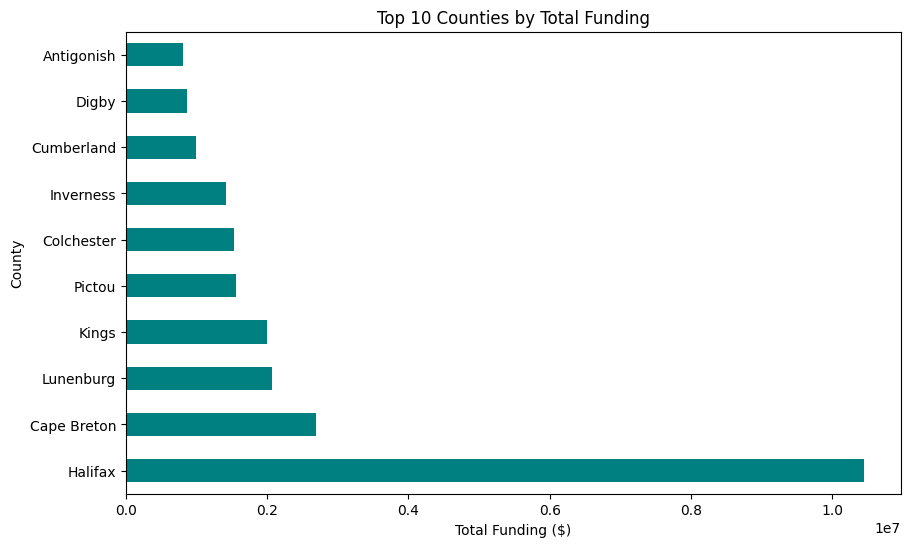

In [24]:
# Slice by county
county_funding = (
    df_clean.groupby('County')
    ['Funding Amount'].sum()
    .sort_values(ascending=False)
    .head(10)
)

# Visualization 2: Horizontal bar chart
plt.figure(figsize=(10,6))
county_funding.plot(kind='barh', color='teal')
plt.title('Top 10 Counties by Total Funding')
plt.xlabel('Total Funding ($)')
plt.show()



Bar Chart to visualize the top 10 grant programs based on total funding allocated, emphasizing their relative financial impact.



<ipython-input-26-f7a1a388e871>:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




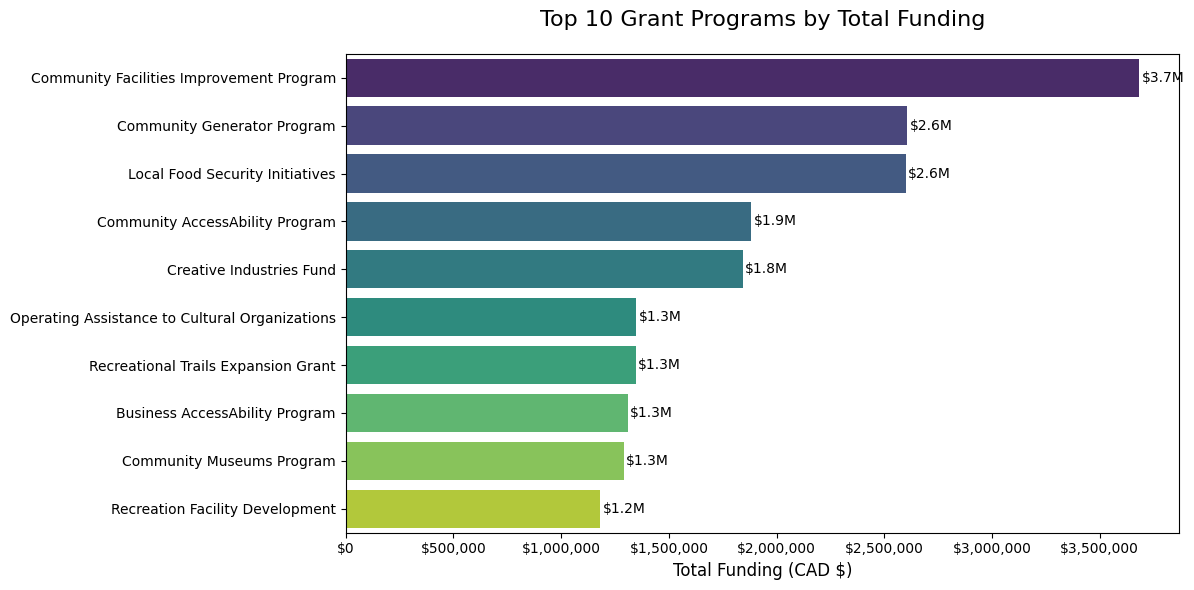

In [26]:
# 1. Group by column name ('Grant Program') and get the top 10
program_funding = (
    df_clean.groupby('Grant Program', as_index=False)
    .agg(
        count=('Funding Amount', 'count'),
        sum=('Funding Amount', 'sum'),
        mean=('Funding Amount', 'mean')
    )
    .sort_values('sum', ascending=False)
    .head(10)  # Select the top 10 programs
)

# 2. Create visualization
plt.figure(figsize=(12, 6))
sns.barplot(
    data=program_funding,
    x='sum',  # Changed from 'Funding Amount' to 'sum'
    y='Grant Program',
    palette='viridis',
    estimator=sum
)

# 3. Formatting
plt.title('Top 10 Grant Programs by Total Funding', fontsize=16, pad=20)
plt.xlabel('Total Funding (CAD $)', fontsize=12)
plt.ylabel('')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Format x-axis with dollar symbols
ax = plt.gca()
ax.xaxis.set_major_formatter('${x:,.0f}')

# Add value labels
for i, value in enumerate(program_funding['sum']): # Changed from 'Funding Amount' to 'sum'
    plt.text(value + 10000, i, f'${value/1000000:.1f}M', ha='left', va='center')

plt.tight_layout()
plt.show()

Plot the total funding allocated across fiscal years to identify trends, growth patterns in annual grant distributions.



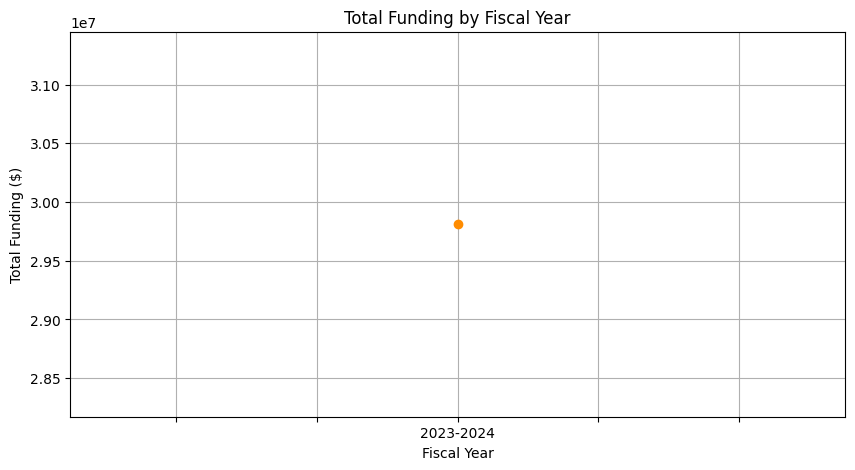

In [18]:
# 4
yearly_funding = df_clean.groupby('Fiscal Year')['Funding Amount'].sum()
plt.figure(figsize=(10, 5))
yearly_funding.plot(
    kind='line',
    marker='o',
    color='darkorange'
)
plt.title('Total Funding by Fiscal Year')
plt.ylabel('Total Funding ($)')
plt.grid(True)
plt.show()

Visualize the relationship between the number of grants awarded, total funding allocated, and average grant size per program using a scatterplot.

<ipython-input-23-a6b32326d949>:15: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.



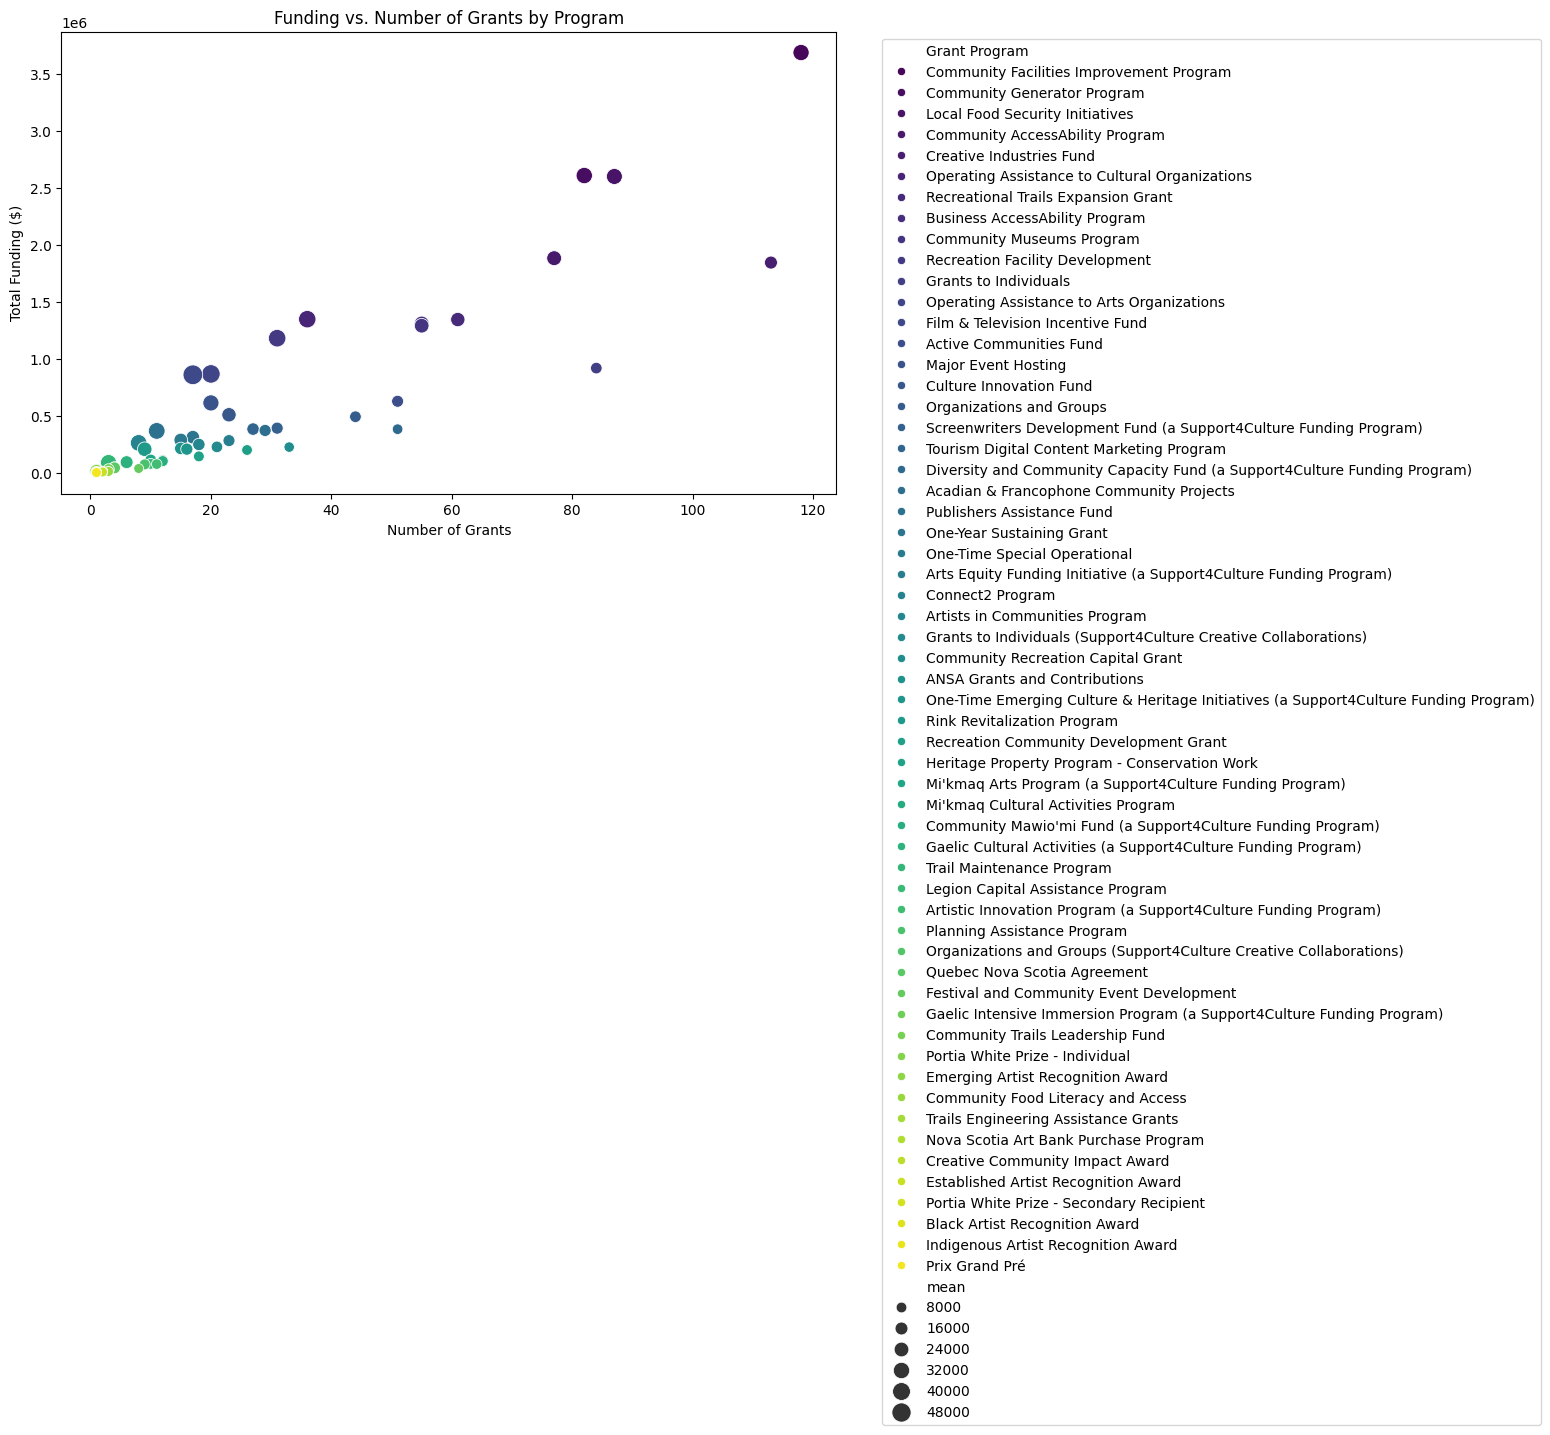

In [23]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=program_stats,
    x='count',
    y='sum',
    hue='Grant Program',
    size='mean',
    sizes=(50, 200),
    palette='viridis'
)
plt.title('Funding vs. Number of Grants by Program')
plt.xlabel('Number of Grants')
plt.ylabel('Total Funding ($)')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

Visualize the distribution of funding across grant programs and top counties using a stacked bar chart, highlighting how funding is allocated geographically and by program

<ipython-input-20-260962cc5792>:19: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.



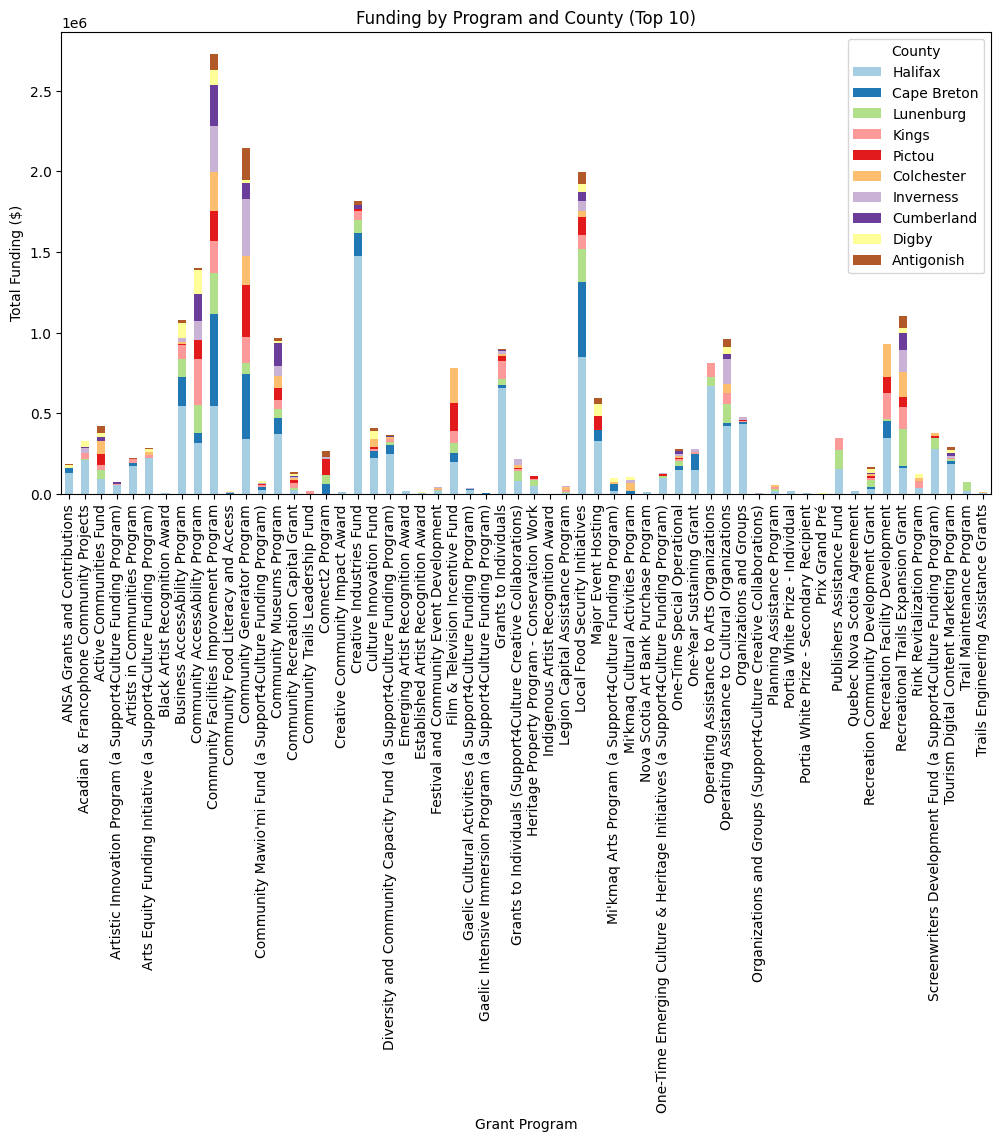

In [20]:
pivot = pd.pivot_table(
    df_clean,
    values='Funding Amount',
    index='Grant Program',
    columns='County',
    aggfunc='sum',
    fill_value=0
).loc[:, county_funding.index]  # Use top counties from Vis 2

pivot.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 6),
    colormap='Paired'
)
plt.title('Funding by Program and County (Top 10)')
plt.ylabel('Total Funding ($)')
plt.legend(title='County', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

This pie chart displays proportional distribution of total funding among the top 5 counties, highlighting regions with the highest grant allocations.

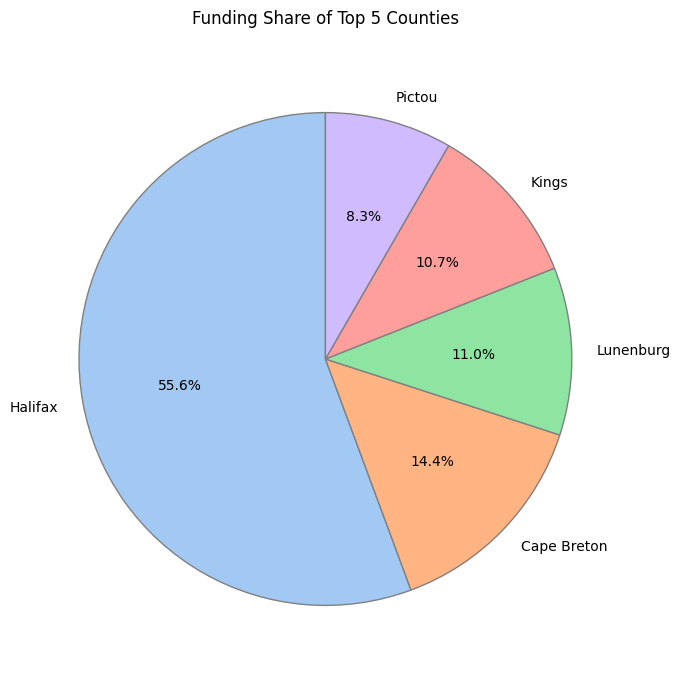

In [21]:
# Get top 5 counties by total funding
top_counties = df_clean.groupby('County')['Funding Amount'].sum().nlargest(5)

# Plot
plt.figure(figsize=(10, 8))
plt.pie(
    top_counties,
    labels=top_counties.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette('pastel'),
    wedgeprops={'edgecolor': 'gray'}
)
plt.title('Funding Share of Top 5 Counties', pad=20)
plt.show()

This histogram display the frequency distribution of grant funding amounts, including a smoothed density curve to highlight trends in the data

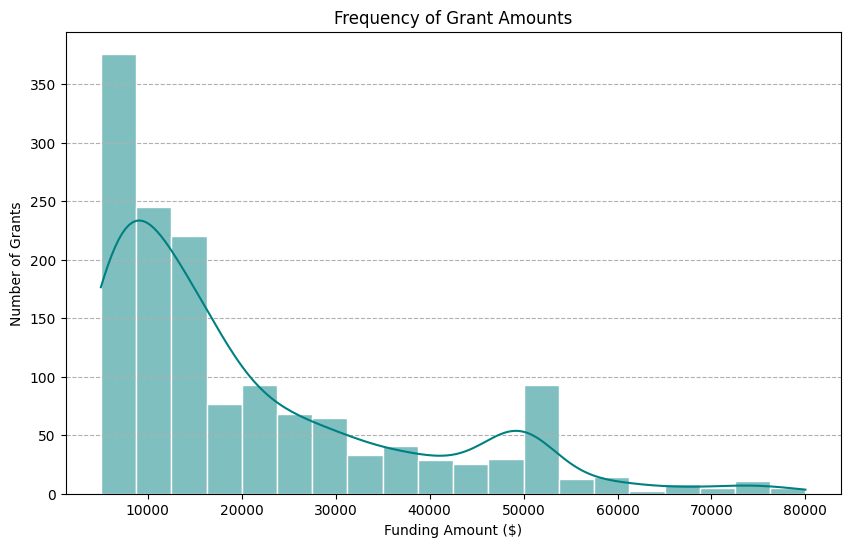

In [22]:
plt.figure(figsize=(10, 6))
sns.histplot(
    data=df_clean,
    x='Funding Amount',
    bins=20,
    kde=True,  # Adds a smoothed distribution line
    color='teal',
    edgecolor='white'
)
plt.title('Frequency of Grant Amounts')
plt.xlabel('Funding Amount ($)')
plt.ylabel('Number of Grants')
plt.grid(axis='y', linestyle='--')
plt.show()

##Video Presentation link: https://teams.microsoft.com/l/message/19:64148929-17b7-4a7e-8b0e-9bc69a2a2097_85194917-419d-4053-9c4e-d3ef7dcbda91@unq.gbl.spaces/1744383166335?context=%7B%22contextType%22%3A%22chat%22%7D